### Week 12 - Lab assignment:

In this assignment you will perform topic modeling using Latent Dirichlet Allocation (LDA) on a dataset of Quora questions and visualize the word cloud for one of the identified topics. For this project you will be working with a dataset of over 400,000 quora questions that have no labeled category and attempting to find 20 categories to assign these questions to.

Steps:
1. Importing Libraries and Data
2. Creating Document-Term Matrix (DTM) using TfidfVectorizer
3. LDA Model Building
4. Displaying Top Words for Each Topic
5. Assigning Topics to Questions
6. Generating Word Cloud for a Specific Topic
7. Ploting the word cloud using Matplotlib

### Import pandas, WordCloud, and matplotlib

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the dataset: quora_questions.csv file into a variable called: quora

In [2]:
quora = pd.read_csv('quora_questions.csv')

#### Display the head

In [3]:
quora.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


### Notice how we don't have the topic of the articles, so let's use LDA to attempt to figure out clusters of the articles.

### Preprocessing

### Use TF-IDF Vectorization to create a vectorized document term matrix. 

### Note: in the example number 2, we used "CountVectorizer" and for this lab, we are using:  TfidfVectorizer

### import TfidfVectorizer

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

#### create a vectorized document term matrix using TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english') and call it: tfidf

In [8]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

#### create a document term matrix dtm using tfidf.fit_transform

In [11]:
dtm = tfidf.fit_transform(quora['Question'])

# LDA

### import LatentDirichletAllocation

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

### create and instance of a LDA with 20 expected components and use random_state=42

In [13]:
LDA = LatentDirichletAllocation(n_components=20, random_state=42)

### fit the model (dtm)

In [16]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=20, random_state=42)

### Using a for loop, print out the top 15 most common words for each of the 20 topics.

In [18]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['good', 'source', 'heard', 'web', 'friends', 'media', 'sydney', 'company', 'development', 'does', 'service', 'social', 'digital', 'marketing', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['doctor', 'addiction', 'best', 'used', 'interview', 'process', 'making', 'does', 'speak', 'god', 'porn', 'sentence', 'tips', 'english', 'word']


THE TOP 15 WORDS FOR TOPIC #2
['actor', 'rehab', 'spotify', 'county', 'best', 'gst', 'good', 'drug', 'structure', 'does', 'india', 'center', 'alcohol', 'successful', 'education']


THE TOP 15 WORDS FOR TOPIC #3
['interesting', 'asked', 'series', 'big', 'facts', 'don', 'know', 'exist', 'tv', 'answers', 'mind', 'iphone', 'people', 'questions', 'quora']


THE TOP 15 WORDS FOR TOPIC #4
['australia', 'corporate', 'types', 'car', 'difference', 'companies', 'address', 'differences', 'value', 'best', 'jobs', 'india', 'does', 'different', 'culture']


THE TOP 15 WORDS FOR TOPIC #5
['like', 'win', 'long', 'distance', 'russia', 'country', 'di

#### Add a new column to the original quora dataframe that labels each question into one of the 20 topic categories.

In [20]:
topic_results = LDA.transform(dtm)
quora

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."
...,...
404284,How many keywords are there in the Racket prog...
404285,Do you believe there is life after death?
404286,What is one coin?
404287,What is the approx annual cost of living while...


In [21]:
topic_results.argmax(axis=1)
quora['Topic'] = topic_results.argmax(axis=1)

#### Display the head(10)

In [22]:
quora.head(10)

,Question,Topic
0,What is the step by step guide to invest in sh...,16
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,17
2,How can I increase the speed of my internet co...,8
3,Why am I mentally very lonely? How can I solve...,19
4,"Which one dissolve in water quikly sugar, salt...",17
5,Astrology: I am a Capricorn Sun Cap moon and c...,2
6,Should I buy tiago?,17
7,How can I be a good geologist?,15
8,When do you use シ instead of し?,3
9,Motorola (company): Can I hack my Charter Moto...,7


In [ ]:
# sample

#### Use WordCloud to print one topics 

In [36]:
#Here is the topic
topic_8 = quora[quora['Topic'] == 8]['Question'].to_string()

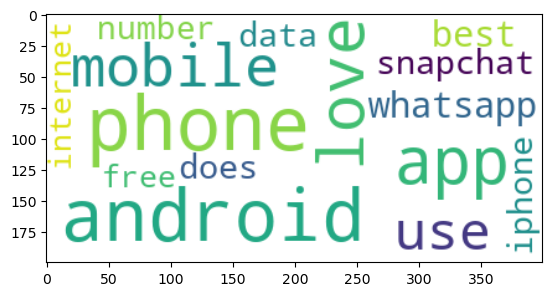

In [38]:
# use wordcloud here
import matplotlib.pyplot as plt
%matplotlib inline

terms_count = 15

topic_8 = LDA.components_[8]
topic_results = abs(topic_8)

topic_8_terms = [[terms[i],topic_8[i]] for i in topic_results.argsort()[:-terms_count-1:-1]]
topic_8_terms_sorted = [[terms[i], topic_8[i]] for i in topic_results.argsort()[:-terms_count -1:-1]]

topic_words_8 = []

for i in range(terms_count):
    topic_words_8.append(topic_8_terms_sorted[i][0])
    
dict_word_frequency_8 = {}

for i in range(terms_count):
    dict_word_frequency_8[topic_8_terms_sorted[i][0]] = topic_8_terms_sorted[i][1]

wcloud = WordCloud(background_color="white",mask=None, max_words=100,max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
contour_width=3,contour_color='black')

wcloud.generate_from_frequencies(dict_word_frequency_8)

plt.imshow(wcloud, interpolation='bilinear')
